<a href="https://colab.research.google.com/github/zakariarafi/streamlit_app/blob/main/Zakaria_Rafi_zakariarafifahmi_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Nama dataset
- Nama: Zakaria Rafi
- Email: zakariarafifahmi@gmail.com
- Id Dicoding:zakaria_rafi

## Menentukan Pertanyaan Bisnis

- pertanyaan 1: Bagaimana pola penyewaan sepeda harian berubah sepanjang tahun, dan apakah ada pola musiman?
- pertanyaan 2: Pada jam berapa dalam sehari jumlah penyewaan sepeda mencapai puncaknya?

## Menyiapkan semua library yang dibuthkan

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #untuk clustering

## Data Wrangling

### Gathering Data

In [71]:
# Load datasets
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

### Assessing Data

In [72]:
# Menampilkan baris pertama dari masing-masing dataset
print(day_df.head())
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

### Cleaning Data

In [73]:
# Pengecekan jika ada nilai yang hilang
print(day_df.isnull().sum())
print(hour_df.isnull().sum())

# Kita akan menghapus 'instant' karena data ini tidak dibutuhkan
# untuk menjawab pertanyaan ini
day_df.drop('instant', axis=1, inplace=True)
hour_df.drop('instant', axis=1, inplace=True)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore ...

In [74]:
print(day_df.describe())
print(hour_df.describe())

           season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.544894    0.183051    0.162961    0.142429    0.0774

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Text(0, 0.5, 'Jumlah Penyewaan')

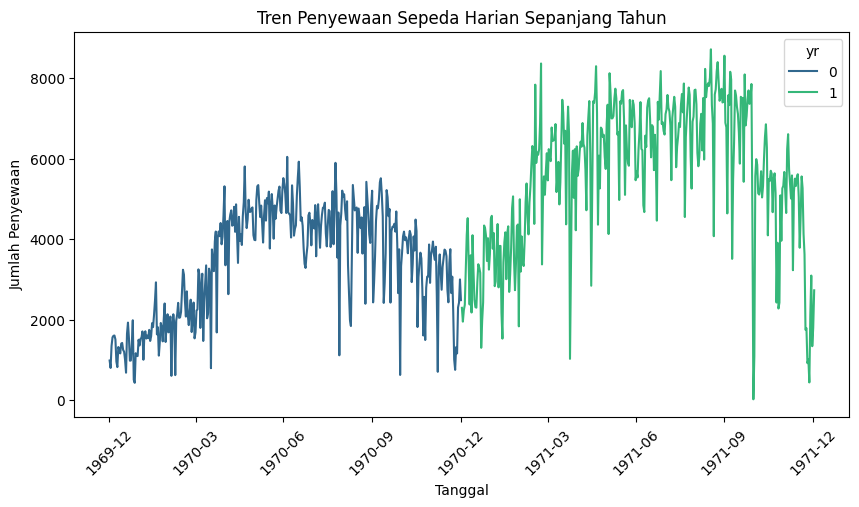

In [75]:
# Plotting+pallette
plt.figure(figsize=(10, 5))
sns.lineplot(data=day_df, x='dteday', y='cnt', hue='yr', palette="viridis")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format tanggal
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1, interval=3))  # label untuk tiap 3 bulan
plt.xticks(rotation=45) #readability
plt.title("Tren Penyewaan Sepeda Harian Sepanjang Tahun")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")

### Pertanyaan 2:

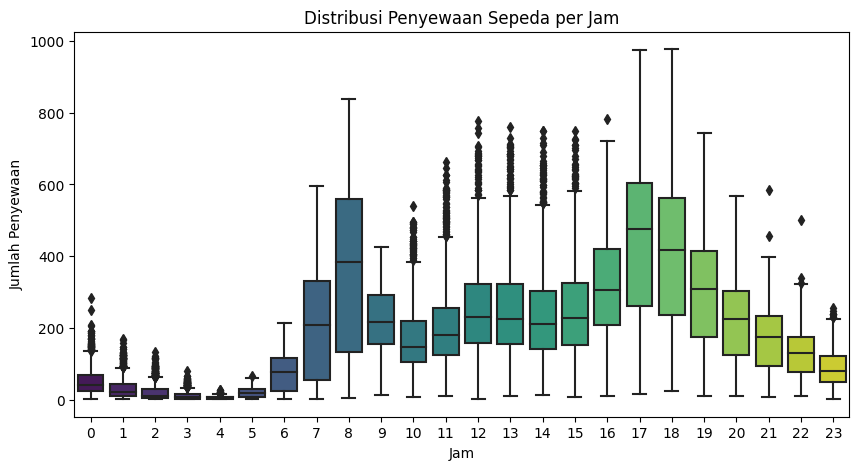

In [76]:
# Plotting distribusi penyewaan sepeda per jam+pallette
plt.figure(figsize=(10, 5))
sns.boxplot(data=hour_df, x='hr', y='cnt', palette="viridis")
plt.title('Distribusi Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.show()

## Conclusion

- Kesimpulan pertanyaan 1:

1.   Ada pola musiman dalam penyewaan sepeda, dengan peningkatan penyewaan sekitar April hingga September (bulan-bulan hangat).

2.   Tren penyewaan menunjukkan peningkatan dari tahun ke tahun.

- Kesimpulan pertanyaan 2:


1.   Ada dua puncak penyewaan sepeda dalam sehari, yang berkorelasi dengan jam berangkat dan pulang kerja.
2.   Optimalisasi ketersediaan sepeda pada jam-jam sibuk dapat meningkatkan layanan kepada pelanggan.



## Teknik Analisis Lanjutan: Clustering

Setelah menganalisis dan mendapatkan kesimpulan mengenai data penyewaan sepeda, kita akan menerapkan teknik clustering untuk lebih memahami pola penyewaan sepeda dan mengelompokkan data berdasarkan karakteristik tertentu.

In [77]:
# Mengkategorikan jam berdasarkan jumlah penyewaan
hour_df['rental_category'] = pd.cut(hour_df['cnt'], bins=[0, 50, 100, np.inf], labels=['Low', 'Medium', 'High'])

# Mengkategorikan hari berdasarkan jumlah penyewaan
day_df['rental_category'] = pd.cut(day_df['cnt'], bins=[0, 1000, 2000, np.inf], labels=['Low', 'Medium', 'High'])

# Menampilkan hasil kategorisasi
print(hour_df[['hr', 'cnt', 'rental_category']].head())
print(day_df[['dteday', 'cnt', 'rental_category']].head())


   hr  cnt rental_category
0   0   16             Low
1   1   40             Low
2   2   32             Low
3   3   13             Low
4   4    1             Low
       dteday   cnt rental_category
0  2011-01-01   985             Low
1  2011-01-02   801             Low
2  2011-01-03  1349          Medium
3  2011-01-04  1562          Medium
4  2011-01-05  1600          Medium


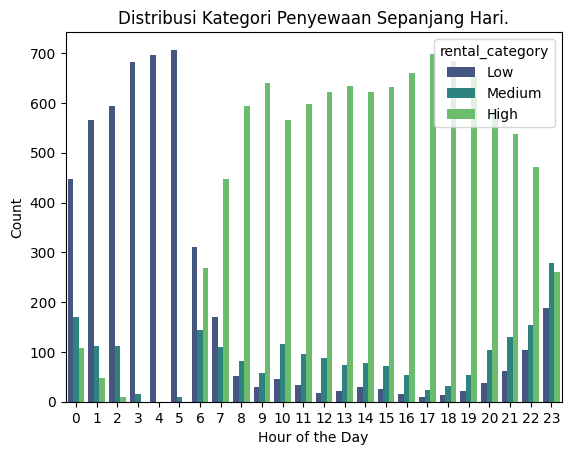

In [81]:
# Plotting the distribution of rental categories throughout the day
sns.countplot(data=hour_df, x='hr', hue='rental_category', palette='viridis')
plt.title('Distribusi Kategori Penyewaan Sepanjang Hari.')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()